In [1]:
from plotting_utils import *
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('ggplot')

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 8
#plt.rcParams['figure.titlesize'] = 15
#plt.rcParams['figure.titleweight'] = 'bold'

#plt.rc('lines', linewidth=4)
#plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
#                           cycler(linestyle=['-', '--', ':', '-.'])))
plt.rc('axes', prop_cycle=(cycler(color=['red', 'green', 'blue', 'yellow','cyan', 'magenta',\
                                         'black', 'orange', 'maroon', 'lime', 'aqua', \
                                         'indigo', 'darkviolet', 'dimgray', 'deeppink'])))



def plot2(ax, data, field, plot_term, params, smooth = None):
    '''data is already in filtered form
    data: {name:list of data_points} '''
    def last(a):
        return a[-1]

    colours = ['red', 'green', 'blue', 'yellow','cyan', 'magenta',\
                'black', 'orange', 'maroon', 'lime', 'aqua', \
                'indigo', 'darkviolet', 'dimgray', 'deeppink']

    all_plots = []
   # all_points = {}
    lookup = set()
    exclude_last_points = 1
    this_cmap = {}
    c_cpy = colours[:]
    c_taken = params["cmap"].values()
    for c in c_taken:
        if c in c_cpy:
            c_cpy.remove(c)
    for i,(k, v) in enumerate(data.items()):
        if plot_term in k:
            exp_id = k.split("_")
            ind = exp_id.index(plot_term)
            plot_term_value = exp_id[ind+1]
            if not plot_term_value in lookup:
                lookup.add(plot_term_value)
                label = params["aliasplotterm"] + ' = ' + plot_term_value
                if not smooth is None:
                    new_data = moving_average_filter(v[field], smooth)
                    exclude_last_points = smooth + 1
                else:
                    new_data = v[field][:]
                x = np.arange(len(new_data))
                
                if label in params["cmap"]:
                    c_hldr = params["cmap"][label]
                else:
                    c_hldr = c_cpy[0]
                    del c_cpy[0]
                this_cmap[label] = c_hldr
                #all_points[label] = (x, new_data, float(plot_term_value))
                handle = ax.plot(x[7:-exclude_last_points], new_data[7:-exclude_last_points], label = label, color = c_hldr)[0]
                all_plots.append((handle,label, float(plot_term_value)))


  #  all_points = {k: v for k, v in sorted(all_points.items(), key=lambda item: item[1][2], reverse = True)}

    handles, labels = ax.get_legend_handles_labels()
    label_id = [float(l.split(" = ")[-1]) for l in labels]
    all_plots = [tuple(i) for i in zip(handles, labels, label_id)]
   # all_plots.sort(key = last, reverse=True)


   # print(handles, labels)

    ax.set_xlabel(params["xlabel"], fontsize = params["xlabelsize"])  # Add an x-label to the axes.
    ax.set_ylabel(params["ylabel"], fontsize = params["ylabelsize"])  # Add a y-label to the axes.
    ax.set_title(params["title"], fontsize = params["titlesize"])  # Add a title to the axes.

  #  handles = [p[0] for p in all_plots]
   # lbls = [p[1] for p in all_plots]
    h,l,_ = zip(*all_plots)
    return h, l, this_cmap
    #ax.legend(h, l)  # Add a legend.

# MAAC discount

In [2]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1A2'
all_data = get_event_data(source)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


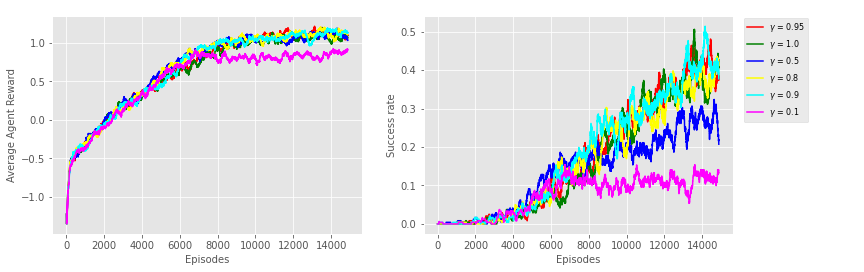

In [3]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=120)


filter_terms2 = []
params2 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Success rate",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "all_agents_on_goal"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=120)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.86,0.55)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

# Reward scales

In [4]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1B2'
all_data = get_event_data(source)


ValueError: not enough values to unpack (expected 3, got 0)

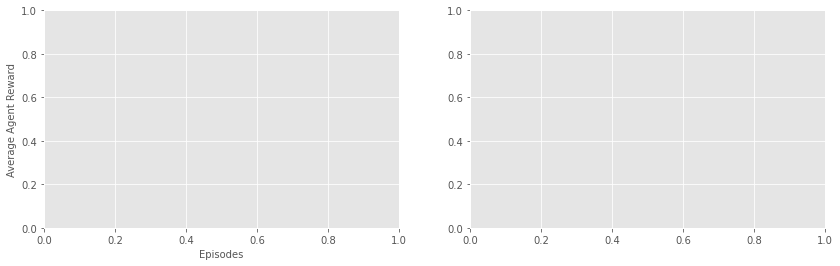

In [5]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "rewardscale"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Reward Scale",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = []
params2 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Success rate",
         "aliasplotterm": "Reward Scale",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "all_agents_on_goal"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

# C Batch sizes

In [6]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1C2'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


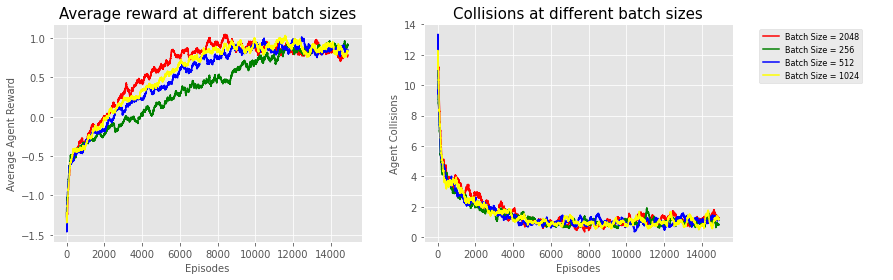

In [7]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "minibatch"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "Average reward at different batch sizes",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=100)


filter_terms2 = []
params2 = {"title": "Collisions at different batch sizes",
         "xlabel": "Episodes",
         "ylabel": "Agent Collisions",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "total_agent_collisions"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=100)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

In [8]:
save_as = "plots/1/maac_1C1.png" 
fig.savefig(make_exist(save_as))